# Cell classification using Raman spectroscopy


To execute the notebook you will need to install kanbu package:

`pip install git+https://github.com/fedorgrab/kanbu.git`

In [1]:
#%pip install git+https://github.com/fedorgrab/kanbu.git

## Initial settings

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import warnings
plt.style.use("seaborn")
warnings.filterwarnings("ignore")

In [4]:
%matplotlib inline

## Data Observation

In [5]:
df = pd.read_csv("data/raman_data.csv")

In [6]:
df

condition       631.73       633.93       636.13       638.32  \
0         0mM  2722.158679  2649.208896  2608.351753  2581.031418   
1         0mM  1213.484940  1226.582386  1193.001331  1175.826554   
2         0mM  1474.161006  1489.110367  1490.720338  1511.444599   
3         0mM  1335.249522  1342.788808  1367.978496  1406.527422   
4         0mM  1415.347943  1352.834788  1346.594143  1350.297459   
..        ...          ...          ...          ...          ...   
173       1mM  2287.576067  2347.690148  2418.599184  2412.325959   
174       1mM  1489.790633  1510.043309  1538.968819  1512.678882   
175       1mM  1373.120642  1369.774167  1408.267513  1423.294449   
176       1mM  1749.089389  1863.249795  1946.404034  1946.152136   
177       1mM  2595.423403  2648.924773  2667.587348  2659.355516   

          640.52       642.72       644.92       647.11       649.31  ...  \
0    2627.967401  2745.957278  2756.194004  2769.764151  2741.896434  ...   
1    1115.523668  1093.738909  1150.629708  1214.843337  1245.452598  ...   
2    1479.359377  1432.780666  1409.550327  1458.110461  1483.209333  ...   
3    1431.902575  1398.372574  1394.613192  1414.194507  1449.188084  ...   
4    1399.049377  1429.077275  1432.214745  1369.103008  1264.024621  ...   
..           ...          ...          ...          ...          ...  ...   
173  2434.302346  2439.506466  2530.607443  2559.197495  2595.786847  ...   
174  1591.965613  1603.788455  1712.623883  1702.323432  1719.920582  ...   
175  1496.827578  1570.743467  1581.037654  1621.989980  1558.783632  ...   
176  1947.051760  1900.997130  1967.408135  2005.155072  2051.393475  ...   
177  2779.039021  2855.822264  2923.906794  2860.330512  2870.020813  ...   

         3102.06       3103.8      3105.54      3107.28      3109.02  \
0    2456.407508  2573.229863  2596.037072  2623.135874  2529.939575   
1    1033.575063   988.390968   996.799078  1058.707067  1043.417561   
2    1537.244371  1536.062527  1535.777206  1573.672391  1476.940190   
3    1069.531876  1084.977879  1093.348629  1121.876674  1096.544761   
4    1100.961398  1024.373862  1055.714201  1060.708069  1122.374348   
..           ...          ...          ...          ...          ...   
173  3124.636854  3119.984227  3101.964920  3133.177603  3148.071949   
174  1858.654945  1852.405637  1907.075351  1933.870192  1971.592693   
175  1654.426094  1702.663070  1782.607274  1830.840104  1819.234175   
176  2181.744280  2131.786928  2210.665025  2315.927014  2338.603585   
177  3410.880420  3333.487532  3408.772829  3501.059881  3517.798671   

         3110.76       3112.5      3114.23      3115.97      3117.71  
0    2505.451064  2523.138371  2521.697143  2464.550152  2484.439146  
1    1057.049246   992.978764   990.486003  1022.257014  1072.746374  
2    1464.770505  1454.660386  1468.955551  1462.648127  1492.857771  
3    1094.108298  1060.108838  1064.540025  1042.396934  1079.641854  
4    1121.164562  1132.105169  1160.110299  1159.436849  1174.949819  
..           ...          ...          ...          ...          ...  
173  3170.619641  3159.705536  3116.753813  3081.828980  3144.910412  
174  1973.421397  1892.114438  1886.476232  1826.441907  1818.719002  
175  1756.252101  1741.254199  1745.291767  1719.254203  1666.504021  
176  2270.165246  2275.319266  2295.426033  2320.600265  2276.184141  
177  3464.128767  3429.965991  3432.128114  3366.289345  3348.214644  

[178 rows x 1287 columns]

In [7]:
df["condition"].value_counts()

0mM      45
1mM      45
0.1mM    44
0.5mM    44
Name: condition, dtype: int64

## Data Analysis

#### Feature extracting

In [8]:
def get_data(df):
    X = df.loc[:, df.columns != "condition"]
    X.columns = X.columns.astype("float")
    return X.loc[:, 800: 1800], df["condition"]

X, y = get_data(df)

In [9]:
import matplotlib.patches as mpatches


def describe_dataset(X, y, from_x_value, to_x_value, title="Results of Raman Spectrum"):
    plt.figure(figsize=(20,10))
    describe_df = X.loc[:, from_x_value: to_x_value].copy()
    value_colors_mapping = {"0mM":"#9b59b6", "1mM":"#3498db", "0.1mM":"#e74c3c", "0.5mM":"#2ecc71"}
    describe_df["color"] = y.map(value_colors_mapping)
    describe_df["label"] = y
    describe_df.apply(lambda row: plt.plot(row.index.values[:-2], row.values[:-2], color=row.values[-2], label=row.values[-1]), axis=1)
    plt.xlabel("Raman Spectrum Wavelenghts", fontsize=18)
    plt.ylabel("Raman Intensivity", fontsize=18)
    plt.title(title, fontsize=26)
    matches = [mpatches.Patch(color=color, label=nut) for nut, color in value_colors_mapping.items()]
    plt.legend(handles=matches, title="cAMP Concentration")

#### Plot the whole data set:

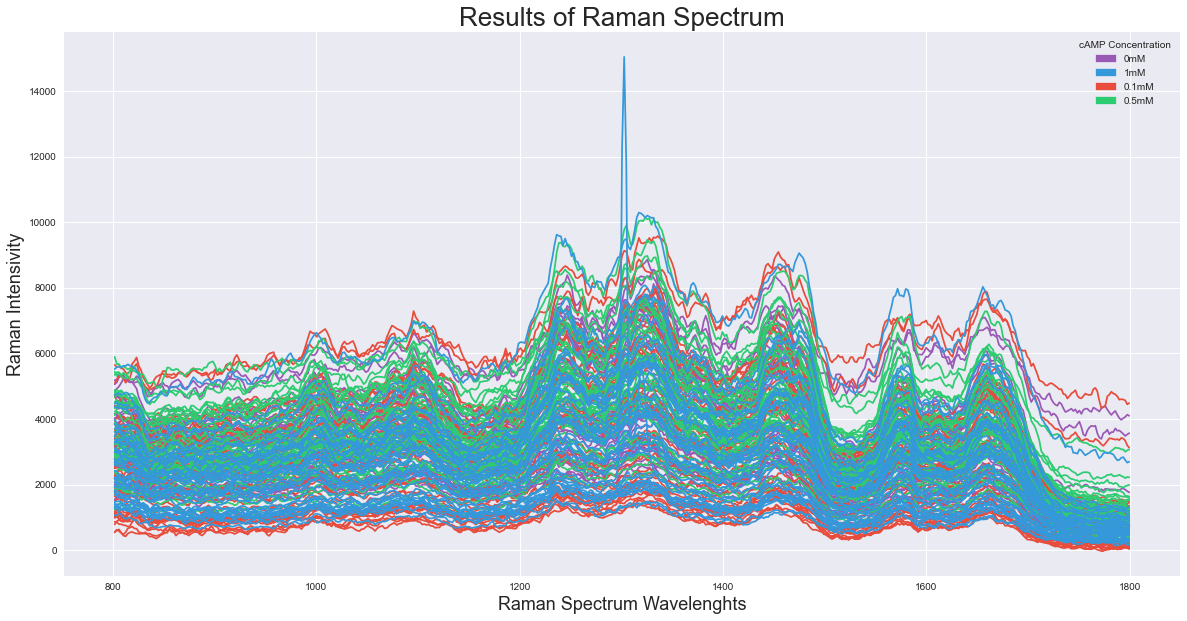

In [10]:
describe_dataset(X, y, 800, 1800)

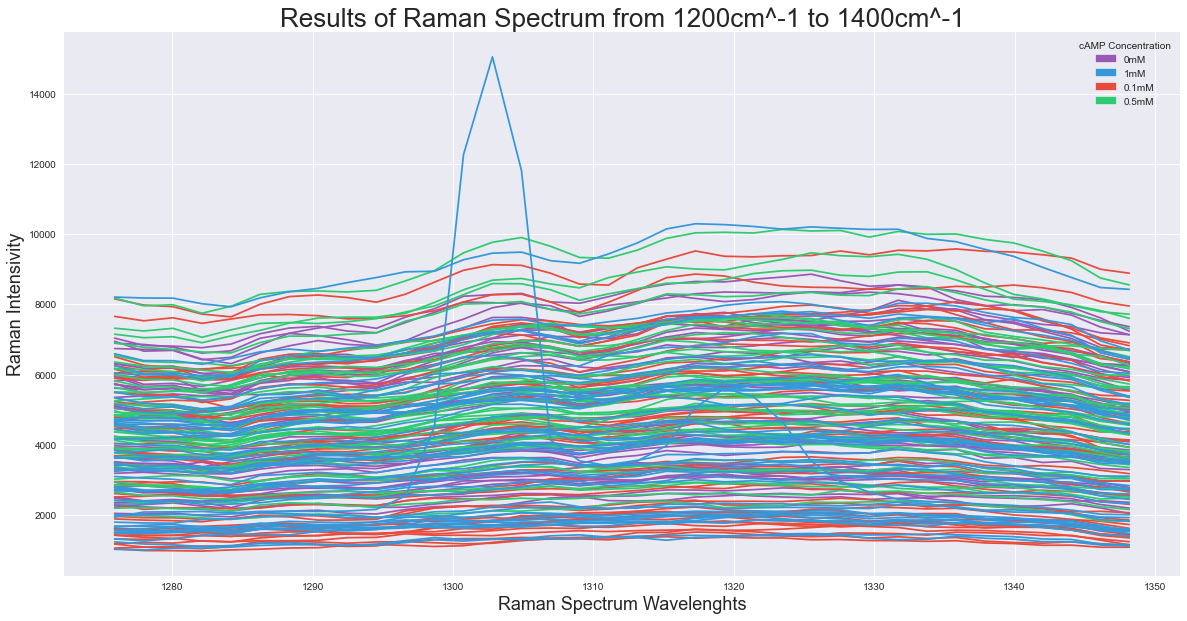

In [11]:
describe_dataset(X, y, 1275, 1350, title="Results of Raman Spectrum from 1200cm^-1 to 1400cm^-1")

Noticeble outlier occured in the interval from 1290cm^-1 to 1310cm^-1

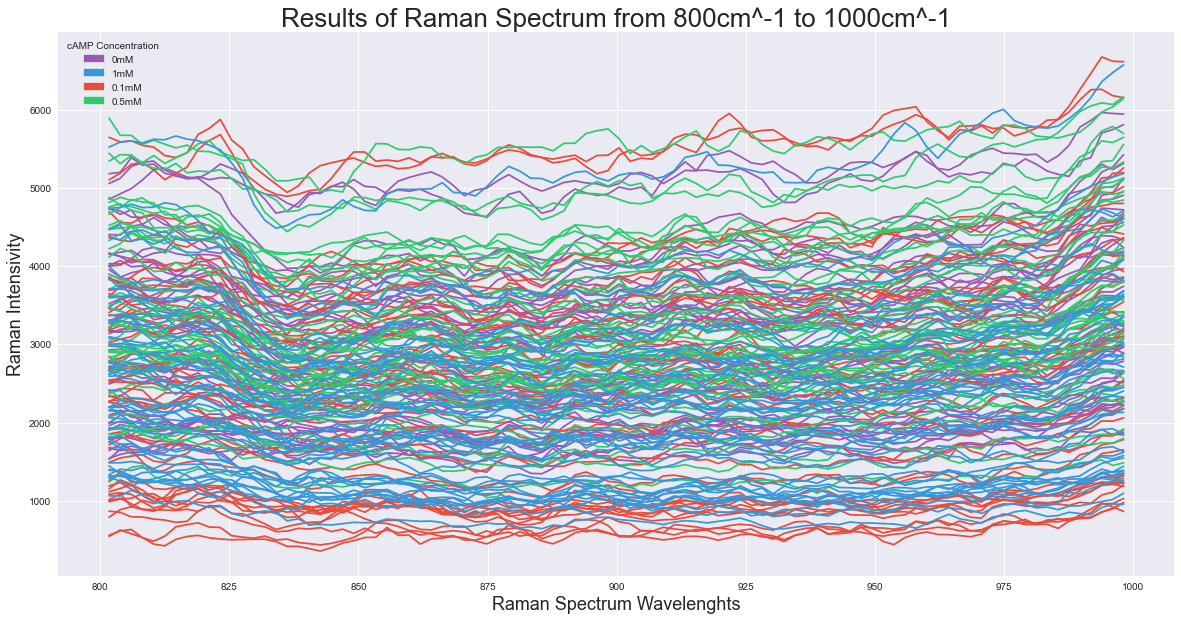

In [12]:
describe_dataset(X, y, 800, 1000, title="Results of Raman Spectrum from 800cm^-1 to 1000cm^-1")

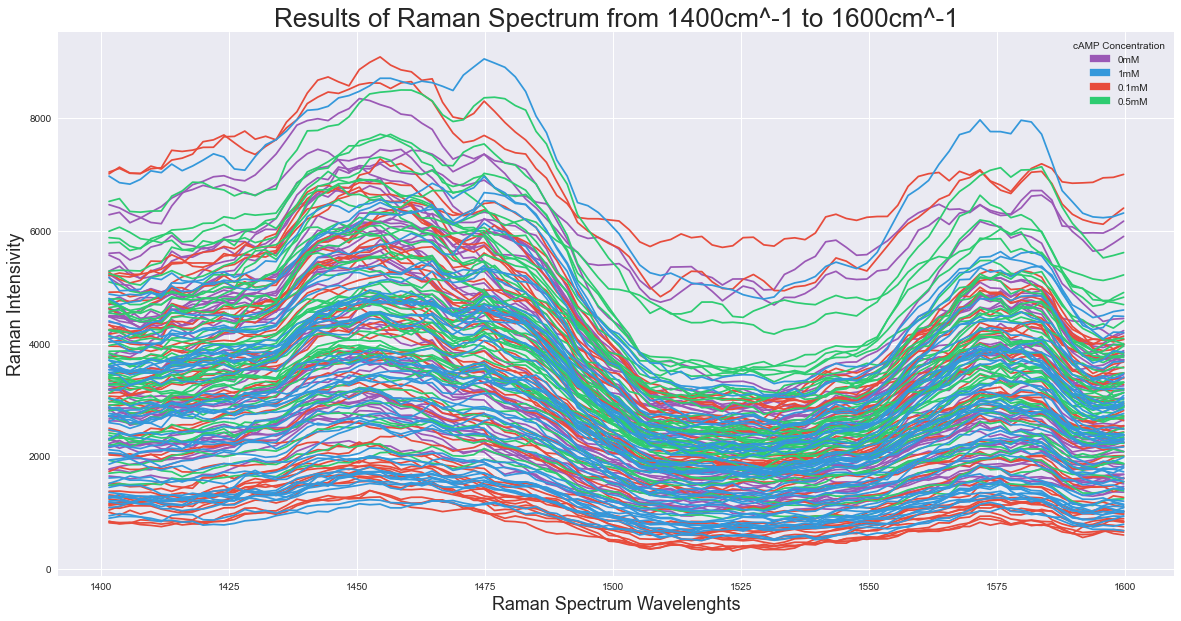

In [13]:
describe_dataset(X, y, 1400, 1600, title="Results of Raman Spectrum from 1400cm^-1 to 1600cm^-1")

## Data Preprocessing

### Removing Outliers

Using the Interquartile Range find outliers: 

**Outliers = Observations > Q3 + 1.5 * IQR  or  Q1 – 1.5 * IQR**

In [14]:
Q1 = X.quantile(0.25)
Q3 = X.quantile(0.75)
IQR = Q3 - Q1

In [15]:
df_ = df[~((X < (Q1 - 1.5 * IQR)) | (X > (Q3 + 1.5 * IQR))).any(axis=1)]
X_IQR, y_IQR = get_data(df_)

In [16]:
X_IQR.shape

(168, 483)

Using the z-score:

**Outliers = |z| > 3; | x(j, i) − μ(j) / (σ) | > 3**

In [17]:
X_st = X.apply(lambda column: (column - column.mean()) / column.std())

In [18]:
df_ = df[~((X_st < -3) | (X_st > 3)).any(axis=1)]
X_z, y_z = get_data(df_)

In [19]:
X_z.shape

(171, 483)

Continue work with a z-score based outlier handling method, because it caugh visible outlier, but it was less sensetive regarding the other instances, hence it allows to save more data points

In [20]:
X, y = X_z, y_z
del X_z, y_z, X_IQR, y_IQR

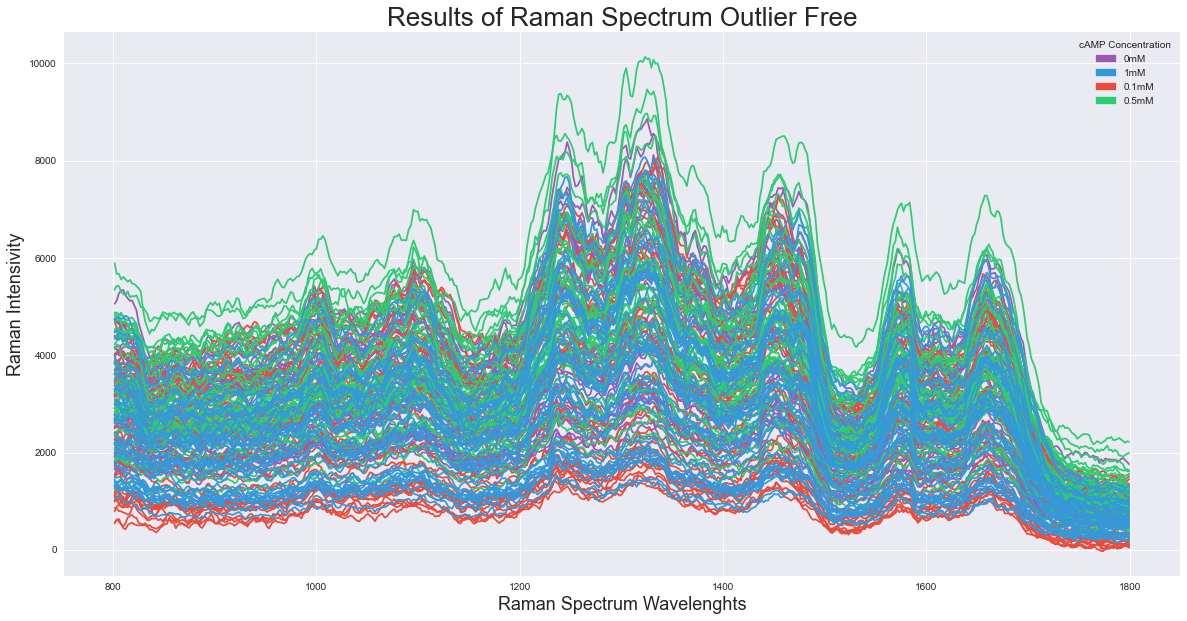

In [21]:
describe_dataset(X, y, 800, 1800, title="Results of Raman Spectrum Outlier Free")

### Normalization

Multiple types of normalization will be applied to classification problem

#### Min-Max Normalization

In [22]:
from sklearn.preprocessing import MinMaxScaler

minmax_scaler = MinMaxScaler().fit(X)

#### Z-score Standartization

In [23]:
from sklearn.preprocessing import StandardScaler


standard_scaler = StandardScaler().fit(X)

#### L2 Normalization

In [24]:
from sklearn.preprocessing import Normalizer

normalizer = Normalizer().fit(X)

### Split Train and Test Samples

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=2)

In [26]:
TEST_DATA_COUNT = y_test.shape[0]

### Data Augmentation

As long as dataset is small, data augmentation can help to achieve better results in prediction.
Basic idea of vector data augmentation is to copy each instance and change it a little (e.g apply shift, or slope)

In [27]:
def dataaugment(X, betashift=0.25, slopeshift=0.45,multishift=0.55):
    # Shift of baseline
    # Calculate arrays
    beta = np.random.random(size=(X.shape[0], 1)) * 2 * betashift-betashift
    slope = np.random.random(size=(X.shape[0], 1)) * 2 * slopeshift-slopeshift + 1
    # Calculate relative position
    axis = np.array(range(X.shape[1])) / float(X.shape[1])
    # Calculate offset to be added
    offset = slope * (axis) + beta - axis - slope / 2. + 0.5
    # Multiplicative
    multi = np.random.random(size=(X.shape[0],1)) * 2 * multishift-multishift + 1

    X_ = multi * X + offset
    return X_

In [28]:
X_aug_test_sample = X_train.to_numpy()[:1]
# Repeating the spectrum 10x
X_aug_test_sample = np.repeat(X_aug_test_sample, repeats=10, axis=0)
# Augment (Large pertubations for illustration)
X_aug_show = dataaugment(X_aug_test_sample,  betashift=0.44, slopeshift=0.5, multishift=0.42)

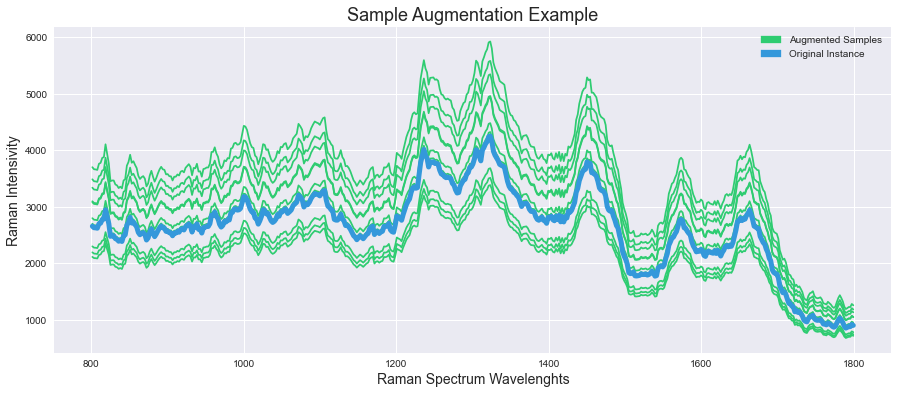

In [29]:
plt.figure(figsize=(15, 6))
[plt.plot(X.columns.values, x, c="#2ecc71") for x in X_aug_show]
plt.plot(X.columns.values, X_train.to_numpy()[0], lw=5, c="#3498db")
value_colors_mapping = {"Augmented Samples":"#2ecc71", "Original Instance":"#3498db"}
matches = [mpatches.Patch(color=color, label=nut) for nut, color in value_colors_mapping.items()]
plt.legend(handles=matches)
plt.title("Sample Augmentation Example", fontsize=18)
plt.xlabel("Raman Spectrum Wavelenghts", fontsize=14)
plt.ylabel("Raman Intensivity", fontsize=14)
plt.show()

In [30]:
def augment_dataset(X, y):
    X_ = np.concatenate(
        [X, *[dataaugment(X, betashift=0.44, slopeshift=0.5, multishift=0.42) for _ in range(19)]]
    )
    y_ = np.concatenate([y for _ in range(20)])
    X_ = pd.DataFrame(X_)
    X_["target"] = y_
    X_ = X_.sample(frac=1)
    y_ = X_["target"]
    X_ = X_.iloc[:,:-1]
    return (X_, y_)

In [31]:
X_train_aug, y_train_aug = augment_dataset(X_train, y_train)

In [32]:
print(
    f"Shape of Augmented X train array: {X_train_aug.shape}",
    f"Shape of Augmented y train array: {y_train_aug.shape}",
    f"Shape of Origin X train array: {X_train.shape}",
    f"Shape of Origin y train array: {y_train.shape}",
    sep="\n"
)

Shape of Augmented X train array: (2560, 483)
Shape of Augmented y train array: (2560,)
Shape of Origin X train array: (128, 483)
Shape of Origin y train array: (128,)


Both datasets will be normilized with different techniques and assessed. The most efficient way will be used.

### Encoding

In [33]:
LABEL_CODE_MAPPING = {"0mM": 0, "1mM": 1, "0.1mM": 2, "0.5mM": 3}

y_test = y_test.map(LABEL_CODE_MAPPING)
y_train = y_train.map(LABEL_CODE_MAPPING)
y_train_aug = y_train_aug.map(LABEL_CODE_MAPPING)

## Model Selection

### Model Extracting

In [34]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis



def create_models():
    return [
        KNeighborsClassifier(),
        SVC(kernel="linear", C=0.025),
        LinearSVC(),
        GaussianProcessClassifier(1.0 * RBF(1.0)),
        RandomForestClassifier(random_state=1, min_samples_leaf=3),
        MLPClassifier(random_state=1),
        AdaBoostClassifier(random_state=1),
        GaussianNB(),
        QuadraticDiscriminantAnalysis(),
        LogisticRegression(random_state=1)
    ]

In [35]:
import kanbu
from kanbu.utils import evaluate_learners
from functools import partial


def evaluate_pipe(models, scaler, X, y):
    X_normalized = scaler.transform(X)
    return evaluate_learners(models, X_normalized, y)

evaluate_models = partial(evaluate_pipe, X=X_train, y=y_train)
evaluate_models_on_aug = partial(evaluate_pipe, X=X_train_aug, y=y_train_aug)

In [36]:
train_scores_mm, test_scores_mm = evaluate_models(create_models(), minmax_scaler)
train_scores_zs, test_scores_zs = evaluate_models(create_models(), standard_scaler)
train_scores_n, test_scores_n = evaluate_models(create_models(), normalizer)

#### Cross-Validation Model Assesment

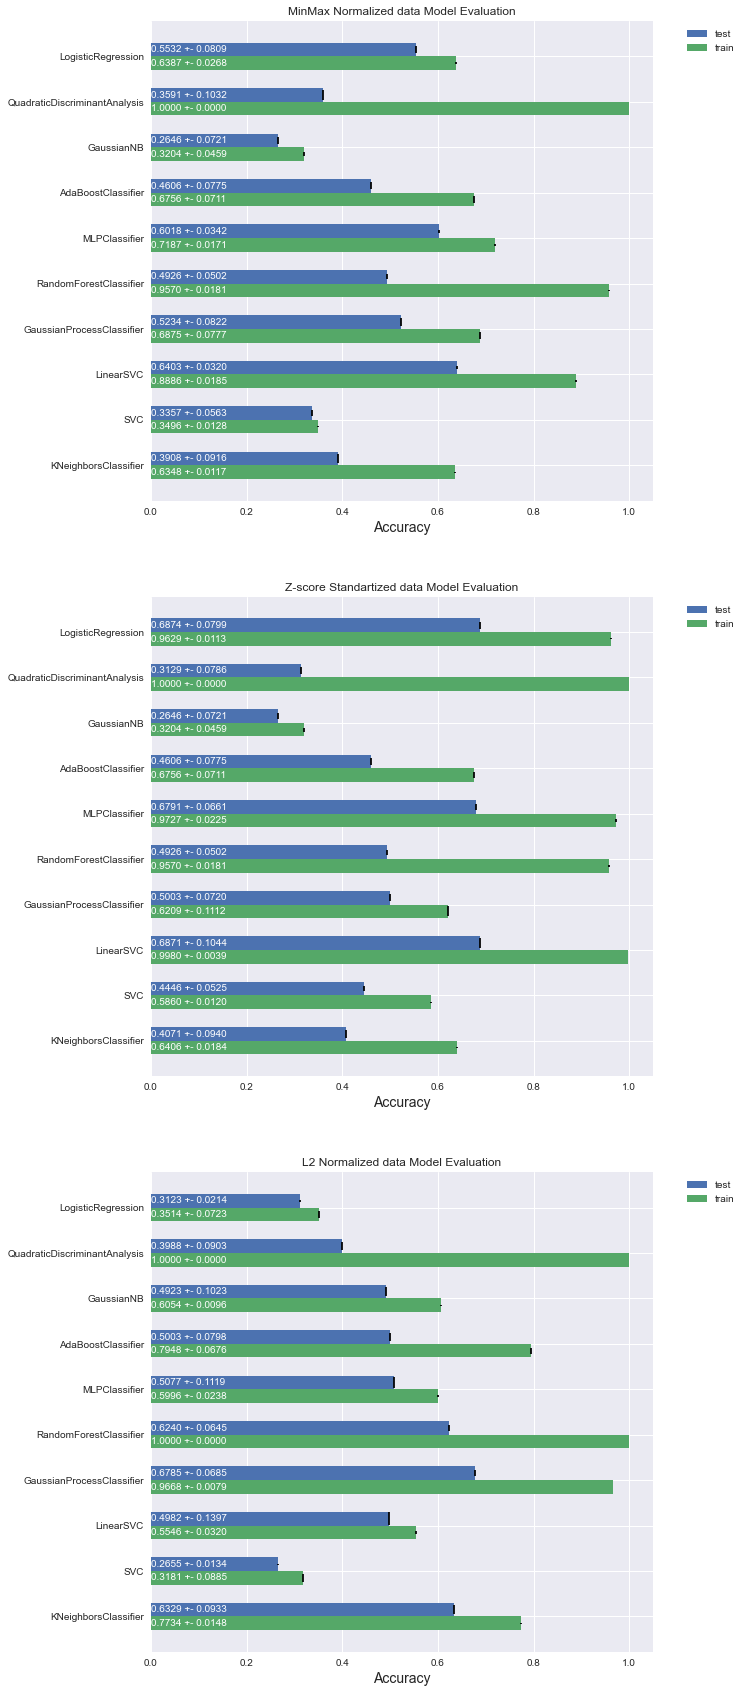

In [37]:
from kanbu.plot import learner_evaluation

fig, [ax1, ax2, ax3] = plt.subplots(nrows=3, ncols=1, figsize=(9, 30))
models = create_models()
learner_evaluation(models, test_scores_mm, train_scores_mm,  ax1, title="MinMax Normalized data Model Evaluation")
learner_evaluation(models,  test_scores_zs, train_scores_zs, ax2, title="Z-score Standartized data Model Evaluation")
learner_evaluation(models,  test_scores_n, train_scores_n, ax3, title="L2 Normalized data Model Evaluation")
plt.show()

According to model evaluation process models below are chosen as the most effecient for this task and will be considered in the following research:
* K-Neighbors Classifier \
    Performed well with standartized and L2 normalized data. Test validation showed 60-63% accuracy without fine tunning. Got a little overfitted on training dataset, but the level of overfitting is acceptable.
* Random Forest Classifier \
    Performed well with standartized and L2 normalized data. Model was extremely overfitted on all types of normalization. 
* Gaussian Process Classifier \
    Performed well with MinMax and L2 normalized data. Model tend to be overfitted more when data is L2 normalized
* MLP Classifier (Neural Network) \
    Performed well with standartized data. Highly overfitted.
* Logistic Regression \
    Showed the highest performance after the model was fitted to standartized data, however in that case model was highly overfitted. Also showed extremely high performance with augmented data.
* LinearSVC \
    Showed the highest performance with z-score normalized data.
   

It is noticeable that with different normalization technique models performed with different accuracy even with the same random seed.
Models need to be tuned as bias-variance trade-off is not followed

According to the experiment results for this particular task Z-score Normalization (a.k.a Standartization) is the most appropriate technique.

### Tuning hyperparameters

#### Testing with Original Data

In [38]:
models = [
    LinearSVC(),
    MLPClassifier(random_state=1),
    LogisticRegression(),
    RandomForestClassifier()
]

params = [
    {"C": np.logspace(0, 1, num=10)},
    {"hidden_layer_sizes": [(100,), (32, 64, 128), (64, 128), (256,), (256, 512), (256, 512, 1024), (256, 512, 4),(256,512,1024, 4), (32, 32, 64, 128), (100,)]},
    {"C": np.logspace(0, 5, num=10)},
    {"n_estimators": np.arange(1, 400, 40)}
]

In [39]:
gss = kanbu.utils.create_grid_searches(models, params, standard_scaler.transform(X_train), y_train)

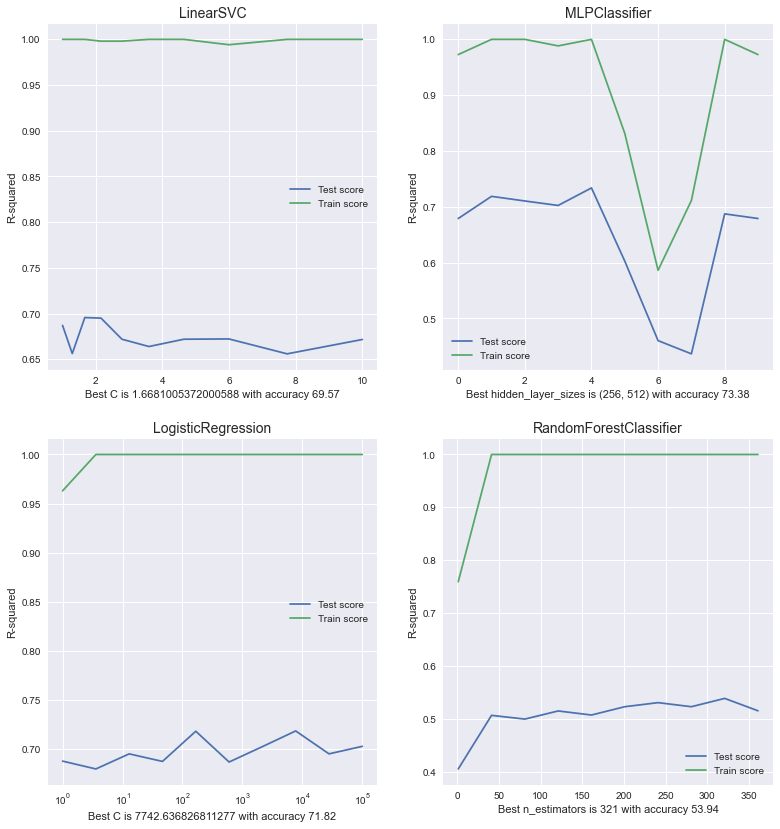

In [40]:
kanbu.plot.model_hyperparameters(gss, params)

Based on the hyperparameter tuning plots the following conclusions were drawn:

1. 1.0 C for LinearSVC.
2. (256, 512) Neural network model architecture. 
3. 7742 C for LogisticRegression
4. RandomForest is no longer used as it did not show high efficience

### Shallow Learning Model Evaluation

In [41]:
from sklearn.metrics import accuracy_score

In [42]:
from sklearn.model_selection import cross_validate, cross_val_score
from sklearn.metrics import accuracy_score
from functools import partial


def model_evaluation_pipeline(model, scaler, X_train, y_train, X_test=X_test, y_test=y_test):
    X_train_normalized = scaler.transform(X_train)
    X_test_normalized = scaler.transform(X_test)
    model.fit(X_train_normalized, y_train)
    preds = model.predict(X_test_normalized)
    return accuracy_score(y_test, preds)

evaluate_model = partial(model_evaluation_pipeline, X_train=X_train, y_train=y_train)
evaluate_model_aug_data = partial(model_evaluation_pipeline, X_train=X_train_aug, y_train=y_train_aug)

#### Cross Validation

In [43]:
lr_1 = LogisticRegression(C=24)
cross_val_score(lr_1, standard_scaler.transform(X_train), y_train).mean()

0.7104615384615385

In [44]:
lsvc = LinearSVC(loss="squared_hinge")
cross_val_score(lsvc, standard_scaler.transform(X_train), y_train).mean()

0.6873846153846153

In [45]:
lr_2 = LogisticRegression(C=29990000)
cross_val_score(lr_2, standard_scaler.transform(X_train), y_train).mean()

0.7341538461538462

Logistic Regression performs better with an extremely high C hyperparameter. However as greater the number C as higher variance model obtains, thus it was decided to test 2 Logistic Regression with cross validation. Model needs more test data to be asserted. So far it is safer to stick to lower value for C hyperparameter.

In [46]:
nn = MLPClassifier(hidden_layer_sizes=(256, 512))
cross_val_score(nn, standard_scaler.transform(X_train), y_train).mean()

0.7495384615384615

#### Test data validation

In [47]:
def test_model(model, scaler):
    X_train_scaled = scaler.transform(X_train)
    model.fit(X_train_scaled, y_train)
    preds = model.predict(scaler.transform(X_test))
    print(f"{model.__class__.__name__} Test Accuracy Score: {accuracy_score(y_test, preds)}")

In [48]:
lr = LogisticRegression(C=7742)
lsvc = LinearSVC(loss="hinge")
nn = MLPClassifier(hidden_layer_sizes=(256, 512), random_state=1)

In [49]:
test_model(lr, standard_scaler)
test_model(lsvc, standard_scaler)
test_model(nn, standard_scaler)

LogisticRegression Test Accuracy Score: 0.7906976744186046
LinearSVC Test Accuracy Score: 0.813953488372093
MLPClassifier Test Accuracy Score: 0.7906976744186046


### Feature Selection

#### Logistic Regression Feature selection

The main idea is to train a Logistic Regression with regularization of type L1, which is commonly used to reduce dimensionality and calculate its coefficients. \
The higher coefficients will point to important features while lower coefficients to irrelevant ones.

In [50]:
lr_l1 = LogisticRegression(penalty="l1", solver="saga").fit(standard_scaler.transform(X_train), y_train)

In [51]:
coef_feat = pd.DataFrame(lr_l1.coef_).T
coef_feat.index = X.columns.values

In [52]:
coef_feat["importance_score"] = coef_feat.apply(lambda row: np.abs(row).sum(), axis=1)
coef_feat["importance"] = coef_feat["importance_score"].map(lambda x: x / coef_feat["importance_score"].max())

In [53]:
def plot_feature_importances(features, importances):
    plt.figure(figsize=(17, 8))
    plt.bar(features, importances, width=1.8)
    plt.title("Raman Spectrum Feature Importance", fontsize=18)
    plt.xlabel("Raman Spectrum Wavelenghts", fontsize=16)
    plt.ylabel("Feature Importance", fontsize=16)
    plt.show()

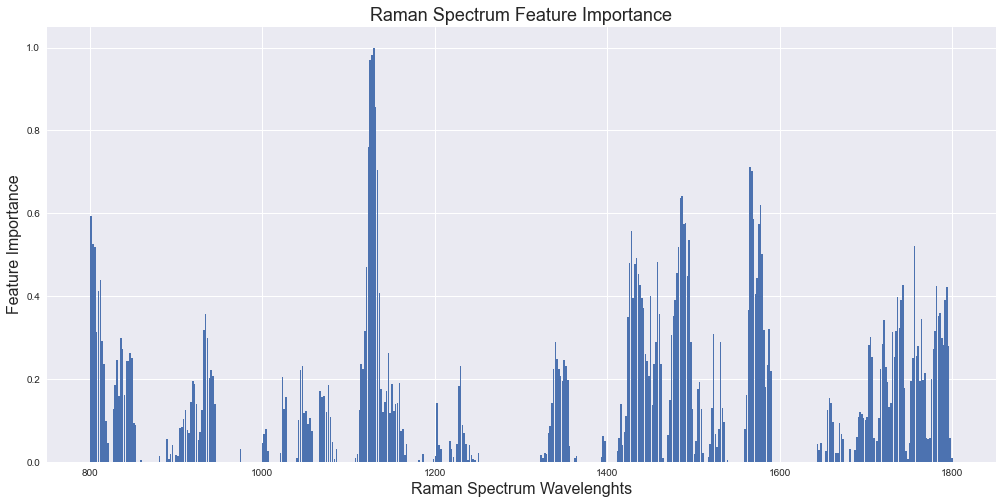

In [54]:
plot_feature_importances(coef_feat.index.values, coef_feat.importance)

#### Regularized Random Forest Feature Importance technique

In [55]:
rf = RandomForestClassifier(n_estimators=20).fit(standard_scaler.transform(X_train), y_train)

In [56]:
rf_feature_importances = rf.feature_importances_
rf_feature_importances = rf_feature_importances / rf_feature_importances.max()

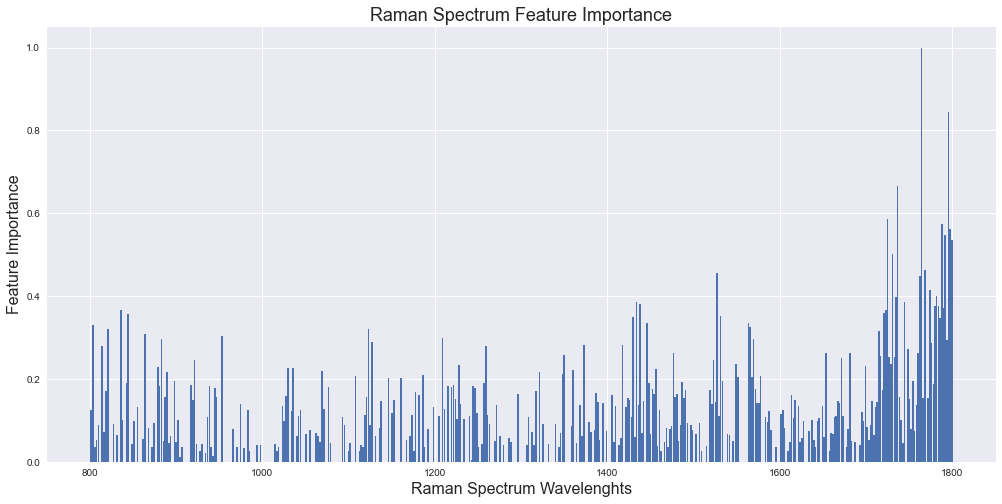

In [57]:
plot_feature_importances(coef_feat.index.values, rf_feature_importances)

Due to the fact that Logistic Regression was more efficient its coefficients are more relevant

### Deep Learning Analysis

In [58]:
from contextlib import suppress
with suppress(Exception):
  %tensorflow_version 2.x
import os
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "1"
import tensorflow as tf
from tensorflow import keras

In [59]:
tf.random.set_seed(1)

In [60]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
 

input_features = X_train.shape[1]

def create_model():
    return models.Sequential([
        layers.Reshape(target_shape=(input_features, 1)),
        layers.Conv1D(
            filters=2,
            kernel_size=64,
            padding="same",
            activation="sigmoid",
        ),
        layers.MaxPooling1D(pool_size=4),
        layers.Flatten(),
        layers.Dense(units=240, activation="sigmoid"),
        layers.Dropout(0.5),
        layers.Dense(units=610, activation="softmax"),
    ])

def compile_model(model):
    model.compile(
        optimizer="adam",
        loss="sparse_categorical_crossentropy",
        metrics=["acc"]
    )

It was decided to use Sparse Categorical Crossentropy loss function, because there are more than 2 label classes provided as integers. In [Keras documentation](https://keras.io/api/losses/probabilistic_losses/#sparse_categorical_crossentropy-function) they suggest to use Categorical Crossentropy loss function in such cases.

In [61]:
from tensorflow.keras import optimizers, metrics

model = create_model()
compile_model(model)

#### Testing Model on Original Data

In [62]:
history = model.fit(x=standard_scaler.transform(X_train), y=y_train, epochs=50, batch_size=1)

Epoch 1/50
128/128 [==============================] - 0s 3ms/step - loss: 2.4624 - acc: 0.3125
Epoch 2/50
128/128 [==============================] - 0s 3ms/step - loss: 1.5892 - acc: 0.2109
Epoch 3/50
128/128 [==============================] - 1s 4ms/step - loss: 1.4873 - acc: 0.2578
Epoch 4/50
128/128 [==============================] - 0s 4ms/step - loss: 1.5636 - acc: 0.2266
Epoch 5/50
128/128 [==============================] - 0s 3ms/step - loss: 1.4312 - acc: 0.2969
Epoch 6/50
128/128 [==============================] - 0s 3ms/step - loss: 1.4744 - acc: 0.3047
Epoch 7/50
128/128 [==============================] - 0s 3ms/step - loss: 1.4116 - acc: 0.3516
Epoch 8/50
128/128 [==============================] - 0s 3ms/step - loss: 1.5624 - acc: 0.2578
Epoch 9/50
128/128 [==============================] - 0s 3ms/step - loss: 1.4712 - acc: 0.2578
Epoch 10/50
128/128 [==============================] - 0s 3ms/step - loss: 1.4340 - acc: 0.2891
Epoch 11/50
128/128 [============================

In [63]:
def evaluate(model):
    score = model.evaluate(standard_scaler.transform(X_test), y_test)
    print('Test loss:', score[0]) 
    print('Test accuracy:', score[1])

evaluate(model)

2/2 [==============================] - 0s 2ms/step - loss: 0.8618 - acc: 0.6279
Test loss: 0.8618487119674683
Test accuracy: 0.6279069781303406


#### Testing Model on Augmented Data

In [64]:
model = create_model()
compile_model(model)
history = model.fit(x=standard_scaler.transform(X_train_aug), y=y_train_aug, epochs=40, batch_size=10)

Epoch 1/40
256/256 [==============================] - 2s 6ms/step - loss: 1.6426 - acc: 0.2914
Epoch 2/40
256/256 [==============================] - 2s 7ms/step - loss: 1.3804 - acc: 0.3281
Epoch 3/40
256/256 [==============================] - 1s 6ms/step - loss: 1.3420 - acc: 0.3316
Epoch 4/40
256/256 [==============================] - 2s 7ms/step - loss: 1.2371 - acc: 0.4207
Epoch 5/40
256/256 [==============================] - 1s 6ms/step - loss: 1.1003 - acc: 0.4941
Epoch 6/40
256/256 [==============================] - 2s 6ms/step - loss: 1.0010 - acc: 0.5590
Epoch 7/40
256/256 [==============================] - 2s 7ms/step - loss: 0.9386 - acc: 0.5801
Epoch 8/40
256/256 [==============================] - 2s 7ms/step - loss: 0.8650 - acc: 0.6309
Epoch 9/40
256/256 [==============================] - 1s 6ms/step - loss: 0.8228 - acc: 0.6426
Epoch 10/40
256/256 [==============================] - 2s 6ms/step - loss: 0.7818 - acc: 0.6656
Epoch 11/40
256/256 [============================

In [65]:
evaluate(model)

2/2 [==============================] - 0s 2ms/step - loss: 1.1393 - acc: 0.8372
Test loss: 1.1392817497253418
Test accuracy: 0.8372092843055725


In [66]:
# model.save("CNN_raman_spectrum.h5")

#### Confusion Matrix

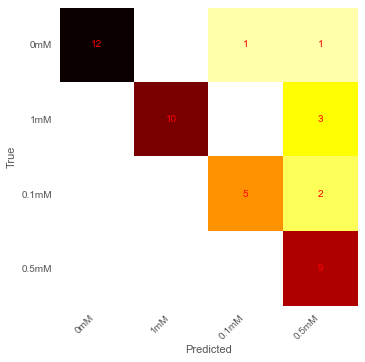

In [80]:
preds = model.predict_classes(standard_scaler.transform(X_test))
kanbu.plot.confusion_matrix(labels=LABEL_CODE_MAPPING, y=y_test, y_pred=preds)

### Optimization, Losses and Metrics

* Linear SVC model performs better with `hinge` loss function than with `squared_hinge`
* Logistic Regression Maximum Likelihood optimization solved with `lbfgs` solver. It was chosen as a default solver program. In this task there were not any needs to change optimization problem solver.
* Neural Networks: in both cases (tensorflow custom Neural Net and Sci-kit learn Multi layer Perceptron) `Adam` optimizer was chosen as one of the most efficient and common used stochastic optimizator.

___
SOURCES: \
L-BFGS-B Nonlinear Optimization Code \
Northwestern.edu \
http://users.iems.northwestern.edu/~nocedal/lbfgsb.html 

Sklearn LinearSVC — Scikit-learn 0.23.2 Documentation \
Scikit-learn.org \
https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html?highlight=linearsvc#sklearn.svm.LinearSVC 

Sklearn LogisticRegression — Scikit-learn 0.23.2 Documentation \
Scikit-learn.org \
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html?highlight=logistic%20regression#sklearn.linear_model.LogisticRegression 

Sklearn Neural Network Multi Layer Perceptron — Scikit-learn 0.23.2 documentation \
Scikit-learn.org \
https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html?highlight=mlpclassifier#sklearn.neural_network.MLPClassifier 

Adam — latest trends in deep learning optimization \
Medium.com \
https://towardsdatascience.com/adam-latest-trends-in-deep-learning-optimization-6be9a291375c

Data Augmentation of Spectral Data for Convolutional Neural Network (CNN) \
Esben Jannik Bjerrum, Mads Glahder, Thomas Skov \
https://arxiv.org/pdf/1710.01927.pdf

Feature selection \
Wikipedia.org \
https://en.wikipedia.org/wiki/Feature_selection

Sklearn Recursive Feature Elimination – Scikit-learn 0.23.2 Documentation \
Scikit-learn.org \
https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html 

Keras documentation: Probabilistic losses \
Keras.io \
https://keras.io/api/losses/probabilistic_losses/#sparse_categorical_crossentropy-function